In [1]:
import pandas as pd
import numpy as np

In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings

In [ ]:
mnist.data.shape

In [ ]:
mnist.target.shape

In [8]:
X, y = mnist.data, mnist.target

In [6]:
y.shape

(70000,)

In [7]:
X.shape

(70000, 784)

In [8]:
28*28

784

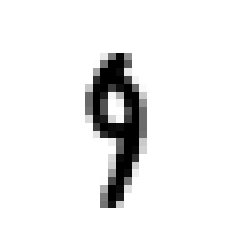

In [35]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm

some_digit = X[2600]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Przetasujmy również zbiór danych uczących; dzięki temu mamy pewność, że podzbiory utworzone
podczas sprawdzianu krzyżowego będą do siebie podobne (nie chcemy, aby w którymś podzbiorze
zabrakło jakiejś cyfry). Ponadto niektóre algorytmy są wrażliwe na kolejność próbek uczących i nie
za dobrze sobie radzą, jeżeli przetwarzają wiele podobnych przykładów z rzędu. Unikniemy tego problemu dzięki przetasowaniu zbioru danych

In [10]:
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [12]:
grid_search.best_params_from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{"weights": ['uniform', 'distance'] }, {'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 183.9min remaining: 58.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 285.1min finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'weights': ['uniform', 'distance']},
                         {'n_neighbors': [3, 4, 5]}],
             verbose=3)

In [ ]:
grid_search.best_params_

In [14]:
grid_search.best_score_

0.9716833333333333

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

W celu uzyskania macierzy pomyłek należy najpierw uzyskać zbiór prognoz, które porównamy z rzeczywistymi wartościami docelowymi. 

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_train, y_train_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[5880    5    5    0    0    8   18    2    1    4]
 [   1 6709   10    0    3    1    2   13    1    2]
 [  46   55 5729   16    7    5   11   73   11    5]
 [   6   15   41 5924    0   60    4   32   27   22]
 [   6   47    2    1 5640    0   11    9    2  124]
 [  22    9    4   69   11 5212   53    5   10   26]
 [  22   14    0    0    4   20 5856    0    2    0]
 [   5   62   13    2   14    1    0 6106    2   60]
 [  21   74   33   75   38   82   22   14 5435   57]
 [  14   18    6   38   71   11    4   62    7 5718]]


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

precision_score(y_train, y_train_pred, average='micro')

0.97015

In [25]:
recall_score(y_train, y_train_pred, average='micro')

0.97015

In [26]:
f1_score(y_train, y_train_pred, average='micro')

0.97015

In [33]:
from scipy.ndimage.interpolation import shift

def shift_image(img, dx, dy):
    img = img.reshape((28, 28))
    new_img = shift(img, [dx, dy])
    return new_img.reshape([-1])

Text(0.5, 1.0, 'Image shifted up')

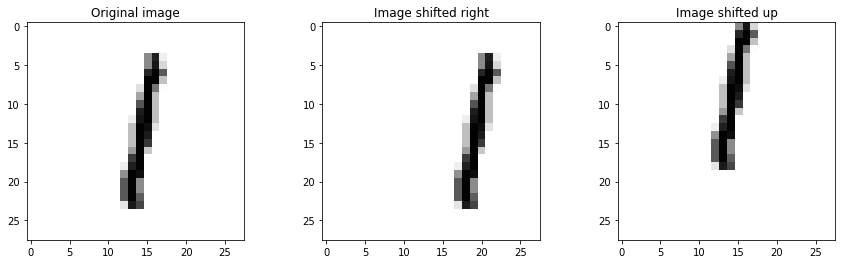

In [41]:
image = X_train[1000]
shifted_image_right = shift_image(image, 0, 5)
shifted_image_up = shift_image(image, -5, 0)

fig, [ax1, ax2, ax3] = plt.subplots(figsize=(15,4), nrows=1, ncols=3);
ax1.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
ax1.set_title("Original image")
ax2.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
ax2.set_title("Image shifted right")
ax3.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
ax3.set_title("Image shifted up")

In [42]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [44]:
shuffle_idx =np.random.permutation(len(X_train_augmented))

X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [45]:
#knn_clf = KNeighborsClassifier(**grid_search.best_params_)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=3)

In [46]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9756

In [1]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [15]:
# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
                print("\nReached 90% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

In [16]:

# Instantiate the callback class
callbacks = myCallback()

# Define the model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
]) 

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

# Fit the model for 10 epochs adding the callbacks
# and save the training history
history = model.fit(training_images, training_labels, epochs=9, callbacks=[callbacks])



Epoch 1/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4755 - accuracy: 0.8295
Epoch 2/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3569 - accuracy: 0.8703
Epoch 3/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3213 - accuracy: 0.8812
Epoch 4/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2983 - accuracy: 0.8892
Epoch 5/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2808 - accuracy: 0.8956
Epoch 6/9
1870/1875 [============================>.] - ETA: 0s - loss: 0.2655 - accuracy: 0.9010
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2655 - accuracy: 0.9010


In [17]:
# Implement concept of Convolutional Neural Networks.

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0


model = tf.keras.models.Sequential([ 
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
    # Add the same layers as before
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
        ])

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.4472 - accuracy: 0.8380
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3008 - accuracy: 0.8893
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2527 - accuracy: 0.9065
Epoch 4/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2203 - accuracy: 0.9182
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1944 - accuracy: 0.9270

MODEL EVALUATION:
313/313 [==============================] - 3s 8ms/step - loss: 0.2555 - accuracy: 0.9065


In [19]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]
